## load Package

In [177]:
# load package
# string 
import re

# math
import pandas as pd
import numpy as np
import scipy as sp
import random

# sys
import sys
import os
import time
import warnings

# machine learning
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, gaussian_process, discriminant_analysis
from xgboost import XGBClassifier

# model utils
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection 
from sklearn import model_selection
from sklearn import metrics

# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix #??
# = show plots in Jupyter Notebook browser
%matplotlib inline 
mpl.style.use('ggplot') #??
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8 #??

# self define
sys.path.append('../../utils/')
import Overview
import Completing
import Correcting
import Modelling

## Overview

In [2]:
# read data
d_train = pd.read_csv('../data/train.csv')
d_test = pd.read_csv('../data/test.csv')

In [9]:
# show some useful methods to get a overview of the data
Overview.show_tools()


    following is same methods that often used in overlook step
    d_train = pd.read_csv('dir')
    d_train.info() # show number of total entries, features type and number
                   # we should code the object features and fill the null value
    d_train.sample(10)
    d_train.head(10)
    d_train.tail(10)
    d_train.describe() # list basic statistic value for numeric feature
    d_train.describe(include = 'all')

    besides we can also plot the feature the get a better viewing
    import matplotlib.pyplot as plt
    import seaborn as sns
    f, ax = plt.subplot(3,4,figsize = (20,16))
    sns.countplot('SibSp', hue = 'Survived', data=train, ax = ax[0,3], palette = 'hus1')
    sns.boxplot(x='Pclass', y= 'Age', data = train, ax = ax[0,2])
    as[0,3].set_title('Survival Rate by SibSp')
    ax[0,2].set_title('Age Box Plot by class')

    after this phase, you should have a overview of all the features, and determine which feature need 4C.
    


In [10]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
d_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [13]:
d_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rogers, Mr. William John",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Survival Rate by Embarked')

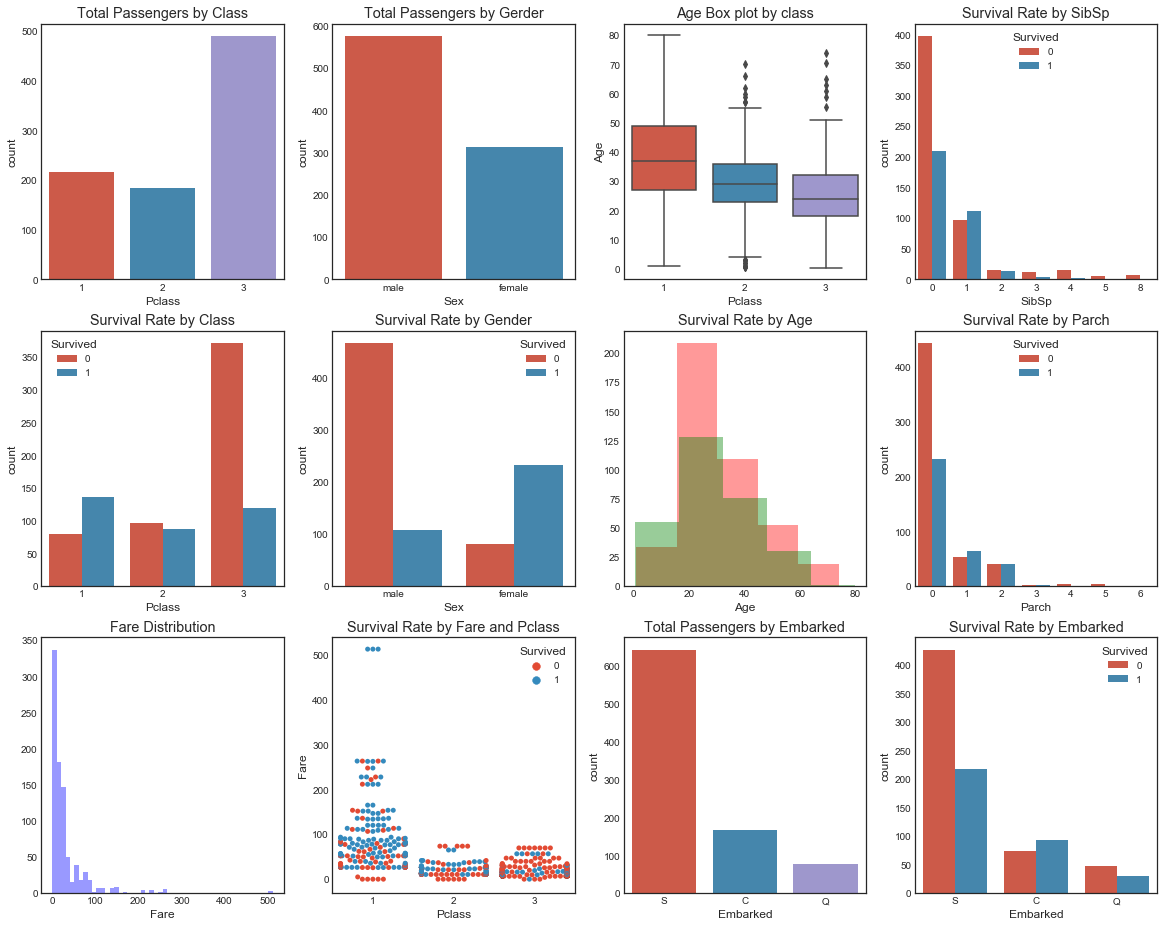

In [18]:
# plot, very first look into the data: distibution, survival rate, ...
f, ax = plt.subplots(3,4, figsize=(20,16))
# show distribution: pclass discrete value, have 3 different classes
sns.countplot('Pclass', data = d_train, ax = ax[0,0])
# show distribution: Sex discrete value, have 2 different classes
sns.countplot('Sex', data = d_train, ax = ax[0,1])
# view age group by Pclass
sns.boxplot(x= 'Pclass', y = 'Age', data = d_train, ax = ax[0,2])
# count Sibsp groupby Survived
sns.countplot('SibSp', hue = 'Survived', data = d_train, ax = ax[0,3])
# distogram, because Fare float is, can not use count here
sns.distplot(d_train['Fare'].dropna(), ax = ax[2,0], kde = False, color = 'b')
sns.countplot('Embarked', data = d_train, ax = ax[2,2])
sns.countplot('Pclass', hue = 'Survived', data = d_train, ax = ax[1,0])
sns.countplot('Sex', hue = 'Survived', data = d_train, ax = ax[1,1])
# combine two in one
sns.distplot(d_train[d_train['Survived']==0]['Age'].dropna(), ax = ax[1,2], kde=False, color = 'r', bins = 5)
sns.distplot(d_train[d_train['Survived']==1]['Age'].dropna(), ax = ax[1,2], kde = False, color = 'g', bins = 5)
sns.countplot('Parch', hue = "Survived", data = d_train, ax = ax[1,3])
# 3 dimensions
sns.swarmplot(x= 'Pclass', y = 'Fare', hue = 'Survived', data = d_train, ax = ax[2,1])
sns.countplot('Embarked', hue = 'Survived', data = d_train, ax = ax[2,3])

# set title
ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gerder')
ax[0,2].set_title('Age Box plot by class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title("Fare Distribution")
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

## 4C
- Complete
- Correct
- Create
- Convert

In [19]:
# Completing
Completing.show_tools()


    d_train = pd.read_csv('dir')
    get the number of null wert with:
        d_train.isnull().sum()
    
    For missing data, we always have two methods: complete it(pd.DataFrame.fillna) or delete it(pd.DataFrame.drop)
        d_train['Age'].fillna(d_train['Age'].median(), inplace = True) # numeric wert
        d_train['Embarked'].fillna(d_train['Age'].mode()[0], inplace = True) # object wert
        d_train.drop(['PassengerId', 'Cabin', 'Ticket'], inplace = True)
    
    One problem of the code above is that the value we used is only affected by the feature itseilf. Sametime we may want to use a similar feature to help to fill the value. For example when we want to fill the null value in Fare feature, we can distribute the entries with pclass and fill the value with the median in each group.
    


In [20]:
d_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
d_train['Age'].fillna(d_train['Age'].median(), inplace = True)
d_train['Embarked'].fillna(d_train['Embarked'].mode()[0], inplace = True)
d_test['Fare'].fillna(d_test['Fare'].median(), inplace = True)
d_test['Embarked'].fillna(d_test['Embarked'].mode()[0], inplace = True)
# d_train.drop(['PassengerId', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [130]:
d_test['Age'].fillna(d_train['Age'].median(), inplace = True)

In [30]:
d_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [131]:
d_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Name_length    0
FamilySize     0
Boy            0
Has_Cabin      0
Title          0
Deck           0
dtype: int64

In [32]:
# Correcting
Correcting.show_tools()


    for numeric feature we can use this method:
        detect_outliers(df, n, features)
    for the outlier we can either delete it or fill a new value as in Complete. We make the decision according to the final loss.
        train=train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
    


In [4]:
outlier_to_drop = Correcting.detect_outliers_with_IQR(d_train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
#d_train = d_train.drop(outlier_to_drop, axis = 0).reset_index(drop = True)
d_train.loc[outlier_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,B41,C


## Feature Engineering - Bi-variate statistical analysis
with the help of feature engineering, we can do the following job, to convert the variables into numerical/ordinal values, or to create new features. <br>
We do the work according to the kernel written by Yvon Dalat

In [5]:
# prepare
full_data = [d_train, d_test]
Survival = d_train['Survived']
Survival.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

##### name_length

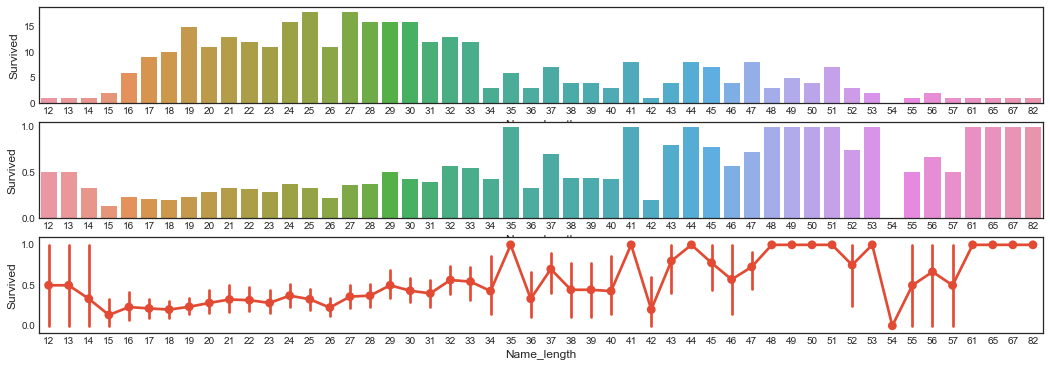

In [7]:
for dataset in full_data:
    dataset['Name_length'] = dataset['Name'].apply(len)
sum_name = d_train[['Name_length','Survived']].groupby(['Name_length'], as_index = False).sum() #不用指定sum谁吗？？
average_name = d_train[['Name_length', 'Survived']].groupby(['Name_length'], as_index = False).mean()
fig, (axis1, axis2, axis3) = plt.subplots(3,1, figsize= (18,6))
# 观看数量或存活率都是片面的，最好对比着看。对于人数多的部分，可以分得比较细一掉，其实第一个图画成countplot估计会更好
sns.barplot(x = 'Name_length', y = 'Survived', data = sum_name, ax = axis1)
sns.barplot(x = 'Name_length', y = 'Survived', data = average_name, ax = axis2)
sns.pointplot(x = 'Name_length', y = 'Survived', data= d_train, ax = axis3)

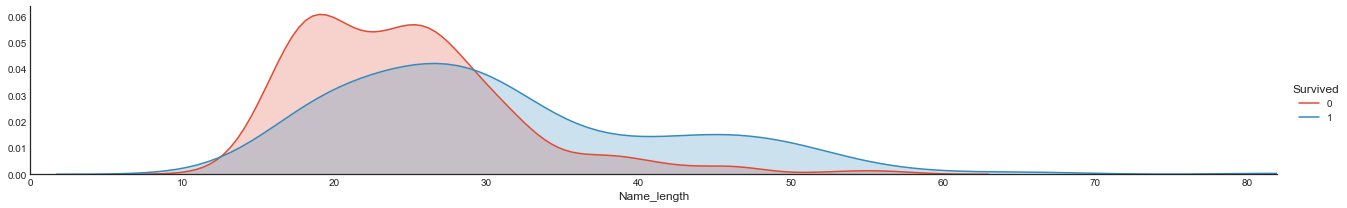

In [8]:
b = sns.FacetGrid(d_train, hue = 'Survived', aspect = 6)
b.map(sns.kdeplot, 'Name_length', shade = True)
b.set(xlim = (0, d_train['Name_length'].max()))
b.add_legend()

In [9]:
for dataset in full_data:
    dataset.loc[dataset['Name_length']<=23, 'Name_length'] = 0
    dataset.loc[(dataset['Name_length']>23)&(dataset['Name_length']<=28), 'Name_length'] = 1
    dataset.loc[(dataset['Name_length']>28)&(dataset['Name_length']<=40), 'Name_length'] = 2
    dataset.loc[dataset['Name_length']>40, 'Name_length'] = 4
d_test['Name_length'].value_counts()

0    164
1    120
2     80
4     54
Name: Name_length, dtype: int64

##### Gender

In [6]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

##### Age

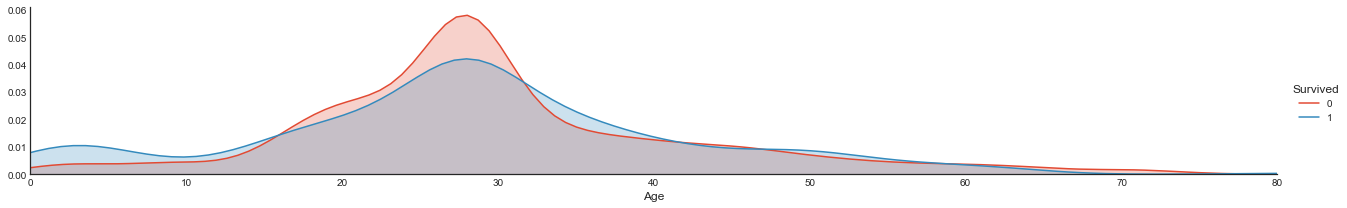

In [10]:
a = sns.FacetGrid(d_train, hue = 'Survived', aspect = 6)
a.map(sns.kdeplot, 'Age', shade = True)
a.set(xlim= (0, d_train['Age'].max()))
a.add_legend()

In [11]:
d_train.loc[d_train['Age']<=14, 'Age'] = 0
d_train.loc[(d_train['Age']>14) & (d_train['Age']<=30), 'Age'] = 5
d_train.loc[(d_train['Age']>30) & (d_train['Age']<=40), 'Age'] = 1
d_train.loc[(d_train['Age']>40) & (d_train['Age']<=50), 'Age'] = 2
d_train.loc[(d_train['Age']>50) & (d_train['Age']<=60), 'Age'] = 3
d_train.loc[d_train['Age']>60, 'Age'] = 4

In [132]:
d_test.loc[d_test['Age']<=14, 'Age'] = 0
d_test.loc[(d_test['Age']>14) & (d_test['Age']<=30), 'Age'] = 5
d_test.loc[(d_test['Age']>30) & (d_test['Age']<=40), 'Age'] = 1
d_test.loc[(d_test['Age']>40) & (d_test['Age']<=50), 'Age'] = 2
d_test.loc[(d_test['Age']>50) & (d_test['Age']<=60), 'Age'] = 3
d_test.loc[d_test['Age']>60, 'Age'] = 4

In [12]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Name_length    891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


##### SibSp and Parch

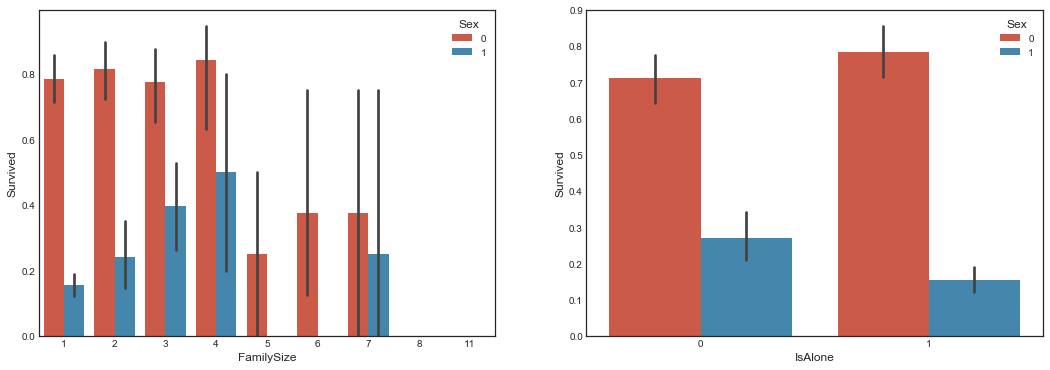

In [13]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
    dataset['IsAlone'] = 0 
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset['Boy'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex'] == 1), 'Boys'] = 1

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x = 'FamilySize', y = 'Survived', hue = "Sex", data = d_train, ax = axis1)
sns.barplot(x = 'IsAlone', y = 'Survived', hue = "Sex", data = d_train, ax = axis2)

##### Fare

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


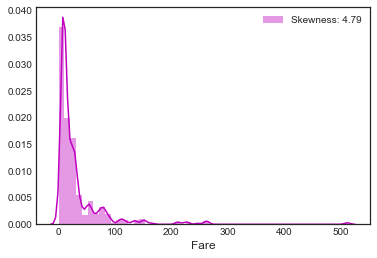

In [14]:
g = sns.distplot(d_train['Fare'], color = 'm', label = 'Skewness: %.2f'%(d_train['Fare'].skew()))
g = g.legend(loc= 'best')

In [15]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].map(lambda i: np.log(i) if i >0 else 0)
   

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


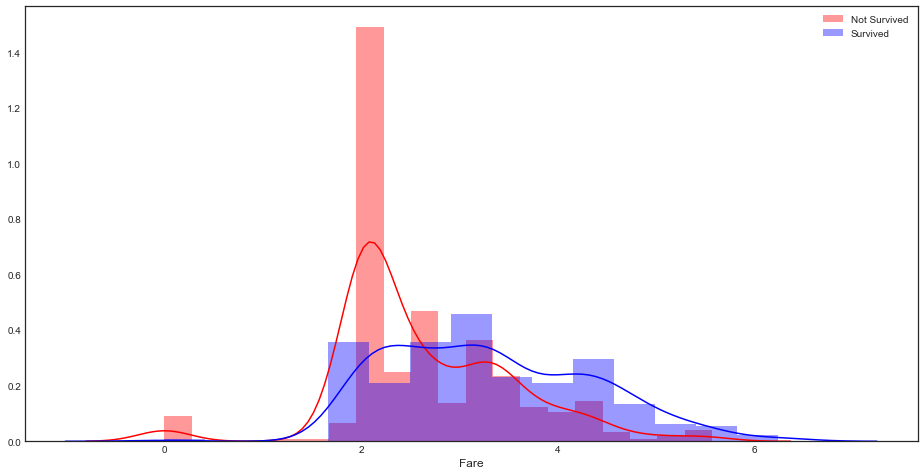

In [16]:
 
fig, ax = plt.subplots(figsize = (16,8))
g = sns.distplot(d_train['Fare'][d_train['Survived']==0], color = 'r', label = 'Skewness: %.2f'%(d_train['Fare'].skew()), ax = ax)
g = sns.distplot(d_train['Fare'][d_train['Survived']==1], color = 'b', label = 'Skewness: %.ef'%(d_train['Fare'].skew()))
g = g.legend(['Not Survived', "Survived"])

In [17]:
for dataset in full_data:
    dataset.loc[dataset['Fare']<=2.7, 'Fare'] = 0
    #dataset.loc[(dataset['Fare']>2.7)&(dataset['Fare']<=3.2)], 'Fare'] = 1
    dataset.loc[dataset['Fare']>2.7, 'Fare'] = 3

##### Cabin

In [18]:
for dataset in full_data:
    dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if type(x) == float else 1) # 用map估计会比较好理解

d_train[['Has_Cabin', 'Survived']].groupby(['Has_Cabin'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


In [19]:
type(d_train['Cabin'][333])

float

##### Embarked

In [20]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [21]:
train_pivot = pd.pivot_table(d_train, values = 'Survived', index = ['Embarked'], columns = 'Pclass', aggfunc = np.mean, margins = True)
train_pivot

Pclass,1,2,3,All
Embarked,,,,
0,0.589147,0.463415,0.189802,0.339009
1,0.694118,0.529412,0.378788,0.553571
2,0.500000,0.666667,0.375000,0.389610
All,0.629630,0.472826,0.242363,0.383838


In [22]:
dataset['Embarked'] = dataset['Embarked'].replace(['0','2'], '0')

##### Titles

In [23]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

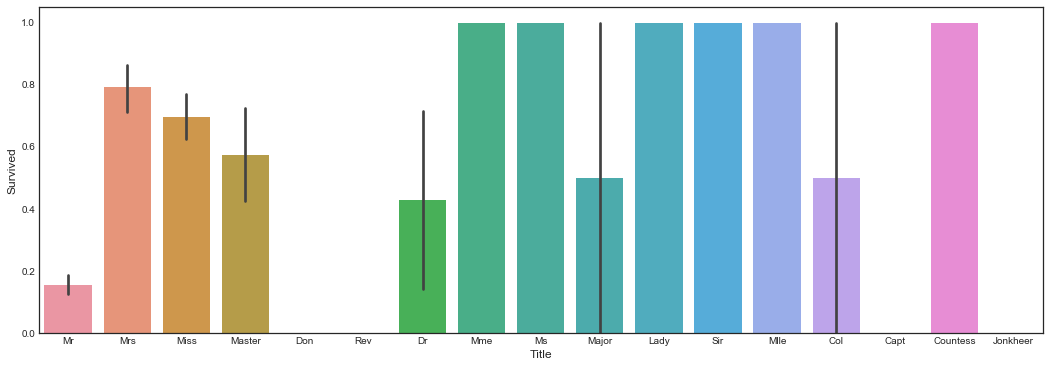

In [24]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
fig, (axis1) = plt.subplots(figsize = (18,6))
sns.barplot(x = 'Title', y = "Survived", data = d_train, ax = axis1)

In [25]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs','Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don','Rev', 'Capt', 'Jonkheer'], 'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'], 'MMLSMC')
    title_mapping = {'MM':1, "Master":2, "Mr":5, "DMC": 4, "DRCJ": 3, "MMLSMC":0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'].fillna(3, inplace = True)

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


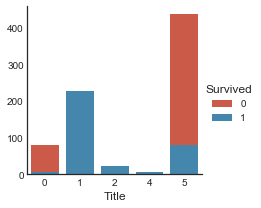

In [26]:
g = sns.FacetGrid(d_train, hue = 'Survived')
g = g.map(sns.countplot, 'Title')
g.add_legend()

##### deck

In [27]:
deck_mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'U':8}
for dataset in full_data:
    dataset['Cabin'].fillna('U', inplace = True)
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)
    dataset['Deck'].fillna(0, inplace = True)
    dataset['Deck'] = dataset['Deck'].astype(int)

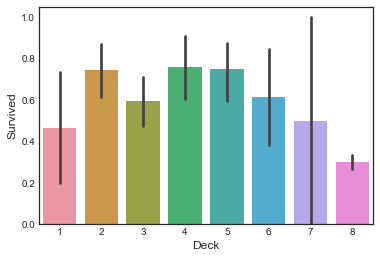

In [28]:
sns.barplot(x = 'Deck', y = 'Survived', order = [1,2,3,4,5,6,7,8], data = d_train)

In [29]:
for dataset in full_data:
    dataset.loc[dataset['Deck'] <= 1, 'Deck'] =1
    dataset.loc[(dataset['Deck']>1)&(dataset['Deck']<=6), 'Deck'] = 2
    dataset.loc[dataset['Deck'] > 6, 'Deck'] = 3
d_train['Deck'].value_counts()

3    691
2    184
1     16
Name: Deck, dtype: int64

In [30]:
d_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,FamilySize,IsAlone,Boy,Boys,Has_Cabin,Title,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,39.0,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,3.463524,0.523008,0.381594,1.461279,0.361392,1.124579,1.904602,0.602694,0.0,1.0,0.228956,3.415264,2.757576
std,257.353842,0.486592,0.836071,0.477990,1.915509,1.102743,0.806057,1.500342,0.635673,1.234873,1.613459,0.489615,0.0,0.0,0.420397,1.912805,0.468846
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000,3.000000
50%,446.000000,0.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,5.000000,3.000000
75%,668.500000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.0,1.0,0.000000,5.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,3.000000,2.000000,4.000000,11.000000,1.000000,0.0,1.0,1.000000,5.000000,3.000000


## Correlation analysis - Tri-variate analysis
上面的分析，仅限于一到两个属性，及他们和目标属性的关系，他们经常被当成分析属性的第一步，用于分析不同属性之间的关系

##### Correlation analysis with histograms and pivot tables

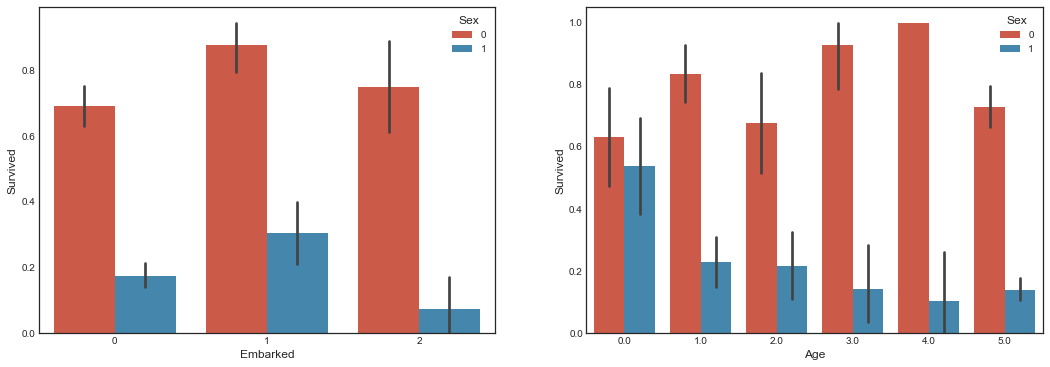

In [31]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize = (18,6))
sns.barplot(x = "Embarked", y = "Survived", hue = "Sex", data = d_train, ax = axis1)
sns.barplot(x = "Age", y = "Survived", hue = "Sex", data = d_train, ax = axis2)

In [32]:
for dataset in full_data:
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age']==0) & (dataset['Sex'] ==1), 'Boys'] = 1

In [33]:
# title-pclass-sex-survival
train_pivot = pd.pivot_table(d_train, values = 'Survived', index = ['Title', 'Pclass'], columns = 'Sex', aggfunc = np.mean, margins = True)
def col_negative_red(val):
    color = 'red' if val< 0.4 else 'black'
    return 'color: %s'%color
#train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

Sex                  0         1       All
Title Pclass                              
0     1       1.000000  1.000000  1.000000
      2       1.000000       NaN  1.000000
1     1       0.965909       NaN  0.965909
      2       0.920000       NaN  0.920000
      3       0.500000       NaN  0.500000
2     1            NaN  1.000000  1.000000
      2            NaN  1.000000  1.000000
      3            NaN  0.392857  0.392857
3     1            NaN  0.000000  0.000000
      2            NaN  0.000000  0.000000
4     1       1.000000  0.500000  0.555556
      2            NaN  0.000000  0.000000
5     1            NaN  0.345794  0.345794
      2            NaN  0.087912  0.087912
      3            NaN  0.112853  0.112853
All           0.742038  0.188908  0.383838

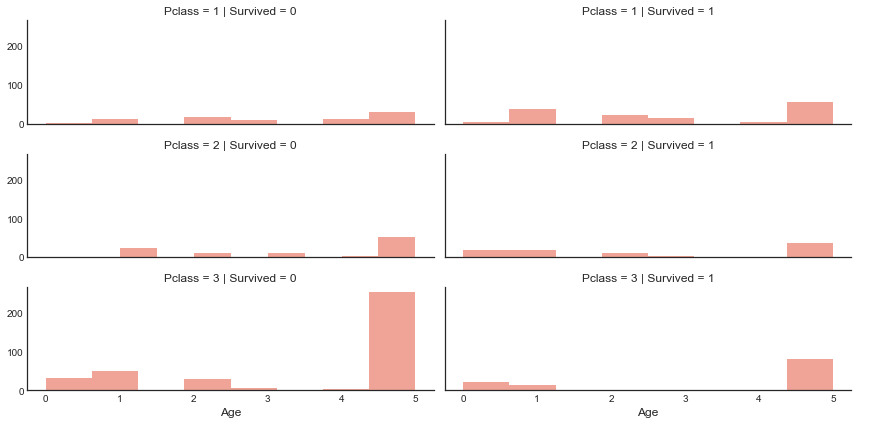

In [34]:
grid = sns.FacetGrid(d_train, col = 'Survived', row = 'Pclass', size = 2, aspect = 3)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 8)
grid.add_legend()

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

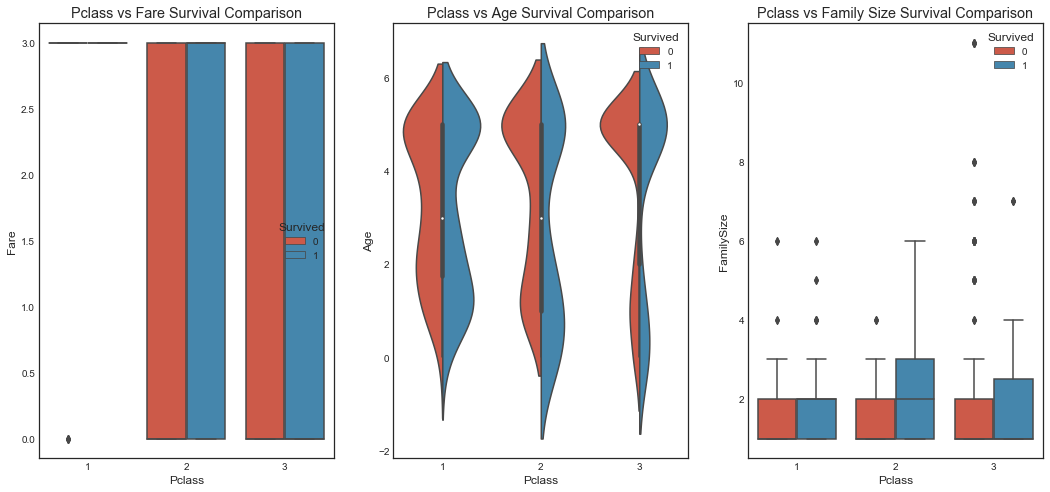

In [35]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (18,8))
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = d_train, ax = axis1)
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = d_train, split = True, ax = axis2)
sns.boxplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', data = d_train, ax = axis3)
axis1.set_title('Pclass vs Fare Survival Comparison')
axis2.set_title('Pclass vs Age Survival Comparison')
axis3.set_title('Pclass vs Family Size Survival Comparison')

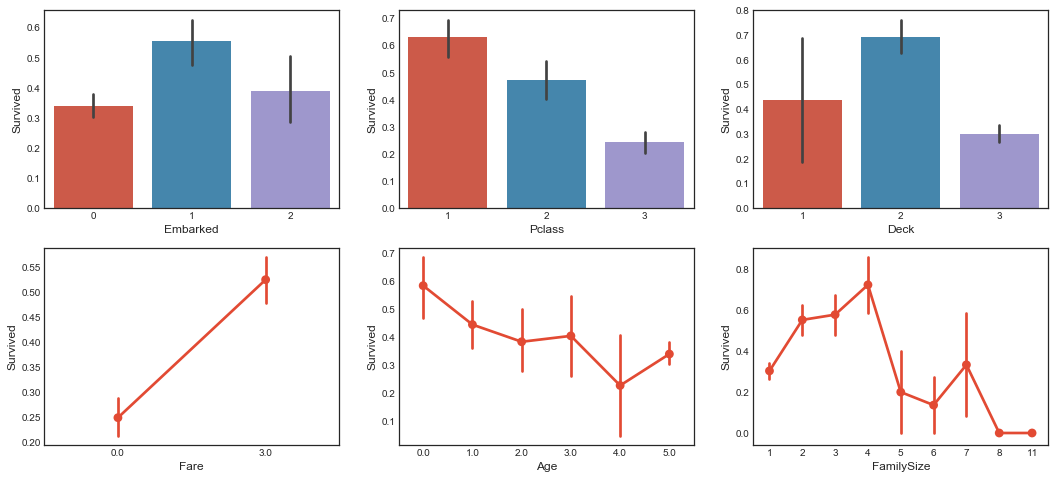

In [36]:
fig, axis = plt.subplots(2,3, figsize=(18,8))
sns.barplot(x = 'Embarked', y = 'Survived', data = d_train, ax = axis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order = [1,2,3], data = d_train, ax = axis[0,1])
sns.barplot(x = 'Deck', y = 'Survived', data = d_train, ax = axis[0,2])

sns.pointplot(x = 'Fare', y = 'Survived', data = d_train, ax = axis[1,0])
sns.pointplot(x = 'Age', y = 'Survived', data = d_train, ax = axis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data = d_train, ax = axis[1,2])

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


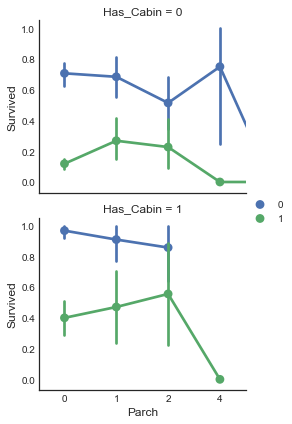

In [37]:
grid = sns.FacetGrid(d_train, row = 'Has_Cabin', aspect = 1.2)
grid.map(sns.pointplot, 'Parch', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [38]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Boys', 'IsAlone', 'Embarked']
d_train = d_train.drop(drop_elements, axis = 1)
d_test = d_test.drop(drop_elements, axis = 1)

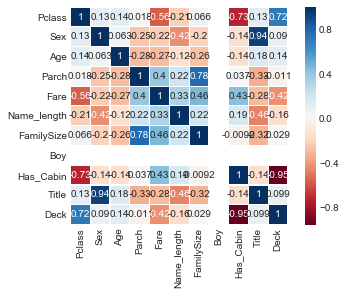

In [45]:
colormap = plt.cm.RdBu
sns.heatmap(d_train.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


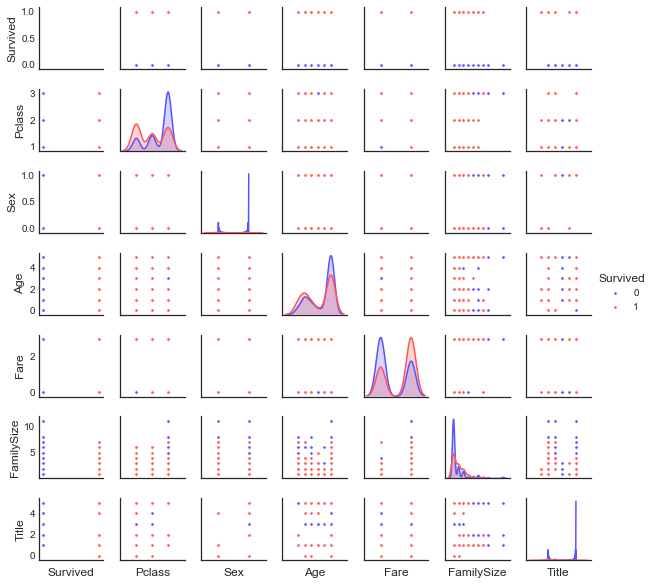

In [133]:
g = sns.pairplot(d_train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title']], hue = 'Survived',
                 palette = 'seismic', size = 1.2, diag_kind = 'kde', 
                 diag_kws = dict(shade=True), plot_kws=dict(s=10))
g.set(xticklabels = [])

In [133]:
# prepare data for training
X_train = d_train.drop(['PassengerId','Survived'], axis = 1)
Y_train = d_train['Survived']
X_train.shape, Y_train.shape, d_test.shape
X_test = d_test.copy()

In [134]:
X_test = X_test.drop(['PassengerId'], axis = 1)

## Modelling


In [94]:
MLA = {
    # Ensemble Methods 
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    # SVM
    svm.SVC(probability = True),
    svm.NuSVC(probability = True),
    svm.LinearSVC(),
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    # Descriminate Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    # xgboot
    XGBClassifier()
}

In [46]:
# cross validation
# run model with 10x with 60/30 split intentionally leaving out 10%
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)
# create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean',
               'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [98]:
# index through MLA and save performance to table
MLA_predict = {}
row_index = 0
for alg in MLA:
    # set name and parameters
    MLA_name = alg.__class__.__name__
    print("#"*88)
    print(MLA_name)
    print("#"*88)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    # score model with cross validation
    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv = cv_split)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    # save MLA predictions
    alg.fit(X_train, Y_train)
    MLA_predict[MLA_name] = alg.predict(X_train)
    row_index += 1

    # sort and print
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
    MLA_compare

########################################################################################
DecisionTreeClassifier
########################################################################################
########################################################################################
SVC
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
GaussianNB
########################################################################################
########################################################################################
ExtraTreeClassifier
########################################################################################
########################################################################################
SGDClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None

########################################################################################
RidgeClassifierCV
########################################################################################
########################################################################################
GaussianProcessClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
LinearDiscriminantAnalysis
########################################################################################
########################################################################################
PassiveAggressiveClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ihuangyiran/anaconda2/e

########################################################################################
LogisticRegressionCV
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
ExtraTreesClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining

########################################################################################
XGBClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sk

########################################################################################
LinearSVC
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
RandomForestClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
BernoulliNB
########################################################################################
########################################################################################
BaggingClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
KNeighborsClassifier
########################################################################################
########################################################################################
NuSVC
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
AdaBoostClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


########################################################################################
Perceptron
########################################################################################
########################################################################################
QuadraticDiscriminantAnalysis
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWar

########################################################################################
GradientBoostingClassifier
########################################################################################


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [100]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
18,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.836704,0.829851,0.0727526,0.164067
1,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.845318,0.827239,0.0480301,0.0618816
17,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.832022,0.826866,0.0416442,0.0681206
11,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.862921,0.823507,0.0688319,0.0622968
21,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.876404,0.821642,0.0463709,0.254081
9,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.826779,0.818284,0.0522774,0.591463
6,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.882772,0.817164,0.0371264,0.269063
12,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.826966,0.816418,0.0554754,0.065078
5,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.823221,0.814552,0.0472409,0.00957117
7,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.823596,0.813806,0.056516,0.00974929


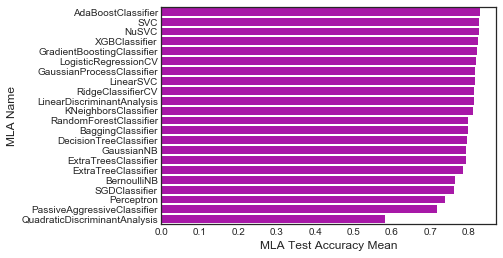

In [103]:
sns.barplot(x = 'MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

In [105]:
MLA_predict_pd = pd.DataFrame.from_dict(MLA_predict)

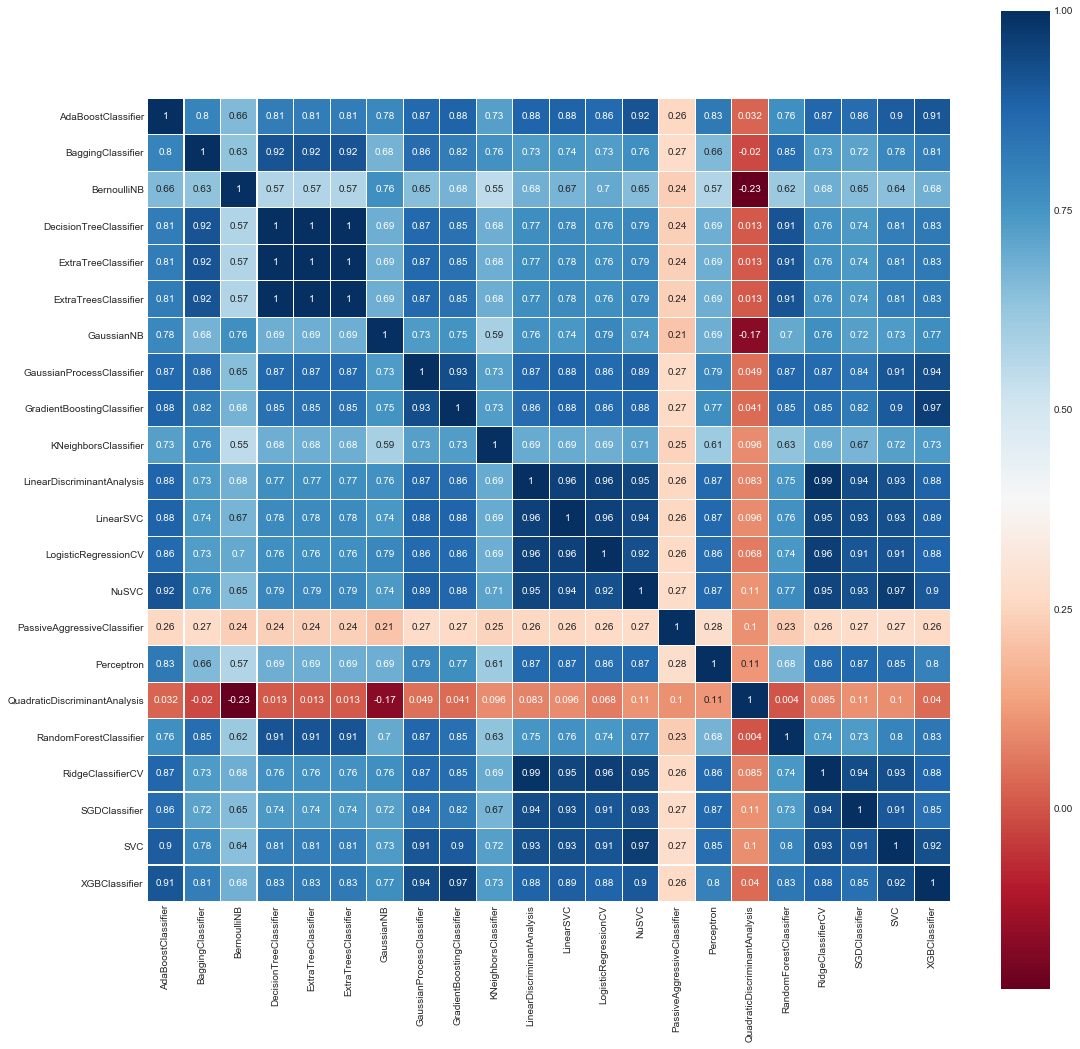

In [107]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(MLA_predict_pd.astype(float).corr(), 
            linewidths = 0.1, vmax = 1.0, ax = ax,
            square = True, cmap = colormap, linecolor = 'white', 
            annot = True)

In [166]:
vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc', ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
#    ('pa', linear_model.PassiveAggressiveClassifier()),
    ('gnb', naive_bayes.GaussianNB()),
    ('knn', neighbors.KNeighborsClassifier()),
    ('rf', ensemble.RandomForestClassifier()),
    ('bnb', naive_bayes.BernoulliNB()),
    ('svc', svm.SVC(probability = True)),
    ('xgb', XGBClassifier())
]

In [165]:
vote_hard = ensemble.VotingClassifier(estimators = vote_est, voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, Y_train, cv = cv_split)
vote_hard.fit(X_train, Y_train)
print("Hard voting Training w/bin score mean: {:.2f}".format(vote_hard_cv['train_score'].mean()*100))
print("Hard voting Test w/bin score mean: {:.2f}".format(vote_hard_cv['test_score'].mean()*100))
print("Hard voting Test w/bin score 3*std: ±{:.2f}".format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

Hard voting Training w/bin score mean: 87.32
Hard voting Test w/bin score mean: 82.91
Hard voting Test w/bin score 3*std: ±4.95
----------


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [167]:
vote_soft = ensemble.VotingClassifier(estimators = vote_est, voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, Y_train, cv =cv_split)
vote_soft.fit(X_train, Y_train)
print("Soft voting Training w/bin score mean: {:.2f}".format(vote_soft_cv['train_score'].mean()*100))
print("Soft voting Test w/bin score mean: {:.2f}".format(vote_soft_cv['test_score'].mean()*100))
print("Soft voting Test w/bin score 3*std: ±{:.2f}".format(vote_soft_cv['test_score'].std()*100*3))

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sk

Soft voting Training w/bin score mean: 88.37
Soft voting Test w/bin score mean: 82.54
Soft voting Test w/bin score 3*std: ±5.75


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [136]:
Y_test = vote_soft.predict(X_test)
test_Survived = pd.Series(Y_test, name = 'Survived')
PassengerID = d_test['PassengerId']
submit = pd.concat([PassengerID, test_Survived], axis = 1)
submit.to_csv('../submit.csv', index = False)

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [149]:
X_test['Title'] = X_test['Title'].astype('int')

## currently result: 0.75

### fine tune

In [329]:
def _get_param_grid_and_model_for_gridsearch(model = 'ada'):
    """
    input:
        model: type of model
    output:
        param_grid, type of dict
        mod: MLA model 
    """
    grid_n_estimator = [10, 50, 100, 300, 600]
    grid_ratio = [.1, .25, .5, .75, 1.0]
    grid_learn = [.01, .03, .05, .1, .25]
    grid_max_depth = [2, 4, 6, 8, 10, None]
    grid_min_samples = [5, 10, .03, .05, 10]
    grid_criterion = ['gini', 'entropy']
    grid_bool = [True, False]
    grid_seed = [0]
    if model == 'adaBoost':
        grid_param = {
#                'base_estimator__criterion': ['gini', 'entropy'],
#                'base_estimator__splitter': ['best', 'random'],
                'n_estimators': grid_n_estimator, # default = 50
                'learning_rate': grid_learn, # default = 1
                'algorithm': ['SAMME', 'SAMME.R'], # default = 'SAMME.R'
                'random_state': grid_seed
                }
        mod = ensemble.AdaBoostClassifier()
    elif model == 'bagging':
        grid_param = {
                'n_estimators': grid_n_estimator, # default = 10
                'max_samples': grid_ratio, # default = 1.0
                'random_state': grid_seed
                }
        mod = ensemble.BaggingClassifier()
    elif model == 'extraTrees':
        grid_param = {
                'n_estimators': grid_n_estimator, # default  = 10
                'criterion': grid_criterion, # default = 'gini'
                'max_depth': grid_max_depth, # default = None
                'max_features': [1, 3, 7],
                'min_samples_split': [2, 3, 7],
                'min_samples_leaf': [1, 3, 7],
                'bootstrap': [False],
                'random_state': grid_seed
                }
        mod = ensemble.ExtraTreesClassifier()
    elif model == 'gradientBoosting':
        grid_param = {
                'loss': ['deviance', 'exponential'], # default = 'deviance'
                'learning_rate': [.1, .05, .01], # default = 0.1
                'n_estimators': [300], # default = 100
                'criterion': ['friedman_mse', 'mse', 'mae'], # default = 'friedman_mse'
                'max_depth': grid_max_depth, # default = 3
                'min_samples_leaf': [100,150],
                'max_features': [.3, .1],
                'random_state': grid_seed
                }
        mod = ensemble.GradientBoostingClassifier()
    elif model == 'randomForest':
        grid_param = {
                'n_estimators': grid_n_estimator, # default = 0
                'criterion': grid_criterion, # default = 'gini'
                'max_depth': grid_max_depth, # default = None
                'oob_score': [True], # default = False
                'random_state': grid_seed,
                'min_samples_split': [2, 3, 7],
                'min_samples_leaf': [1, 3, 7],
                }
        mod = ensemble.RandomForestClassifier()
    elif model == 'gaussianProcess':
        grid_param = {
                'max_iter_predict': grid_n_estimator, # default = 100
                'random_state': grid_seed
                }
        mod = gaussian_process.GaussianProcessClassifier()
    elif model == 'decisionTree':
        param_grid = {
                'criterion': ['gini', 'entropy'], # default gini
                'splitter': ['best', 'random'], # default best
                'max_depth': [2, 4, 6, 8, 10, None], # default None
                'min_samples_split': [2, 5, 10, .03, .05], # minimum subset size before new split, default 2
                'min_samples_lear': [1, 5, 10, .03, .05], # minimum subset size after new split, default 1
                'max_features': [None, 'auto'], # max features to consider when performing split; default noen or all
                'random_state': [0] # seed or control random number generator
                }
        mod = tree.DecisionTreeClassifier()
    elif model == 'logisticRegression':
        grid_param = {
                'fit_intercept': grid_bool, # default = True
                #'penalty': ['11', '12'],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # default: lbfgs
                'random_state': grid_seed
                }
        mod = linear_model.LogisticRegressionCV() # ??
    elif model == 'bernoulliNB':
        grid_param = {
                'alpha': grid_ratio, # default1.0
                }
        mod = naive_bayes.BernoulliNB()
    elif model == 'kNeighbors':
        grid_param = {
                'n_neighbors': [1, 2, 3, 4, 5, 6, 7], # default = 5
                'weights': ['uniform', 'distance'], #default = 'uniform'
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                }
        mod = neighbors.KNeighborsClassifier()
    elif model == 'svc':
        grid_param = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [1, 5, 10, 50, 100, 200, 300, 1000], # default = 1.0
                'gamma': grid_ratio, # default = auto
                'decision_function_shape': ['ovo', 'ovr'], # default = ovr
                'probability': [True],
                'random_state': grid_seed
                }
        mod = svm.SVC(probability = True)
    elif model == 'xgbc':
        grid_param = {
                'learning_rate': grid_learn, # default = .3
                'max_depth': [1, 2, 4, 6, 8, 10], # default = 2
                'n_estimators': grid_n_estimator,
                'seed': grid_seed
                }
        mod = XGBClassifier()
    else:
        print('unrecognized model: '+ model)
    return grid_param, mod

In [318]:
def finetune_gridsearch(model = 'adaBoost'):
    """
    ada: AdaBoostClassifier
    """
    param_grid, mod = _get_param_grid_and_model_for_gridsearch(model)
    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)
    tune_model = model_selection.GridSearchCV(mod, param_grid = param_grid, scoring = 'roc_auc', cv = cv_split)
    return tune_model


###### adaBoost

In [323]:
finetune_model_ada = finetune_gridsearch('adaBoost')

In [324]:
finetune_model_ada.fit(X_train, Y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 300, 600], 'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.25], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [325]:
print('After DT Parameters: ', finetune_model_ada.best_params_)

After DT Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.03, 'n_estimators': 300, 'random_state': 0}


In [326]:
finetune_model_ada.cv_results_['mean_test_score'][finetune_model_ada.best_index_]*100

87.71623505162476

In [327]:
adaBoost_best = finetune_model_ada.best_estimator_

##### bagging: BaggingClassifier

In [321]:
finetune_model = finetune_gridsearch('bagging')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
bagging_best = finetune_model.best_estimator_

After DT Parameters:  {'max_samples': 0.25, 'n_estimators': 600, 'random_state': 0}
After DT Parameters:  87.51861064786105


##### extraTrees: ExtraTreesClassifier

In [330]:
finetune_model = finetune_gridsearch('extraTrees')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
extraTree_best = finetune_model.best_estimator_

After DT Parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 600, 'random_state': 0}
After DT Parameters:  87.66338836657937


##### gradientBoosting: GradientBoostingClassifier

In [331]:
finetune_model = finetune_gridsearch('gradientBoosting')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
gradientBoosting_best = finetune_model.best_estimator_

After DT Parameters:  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300, 'random_state': 0}
After DT Parameters:  87.48782069917186


##### randomForest: RandomForestClassifier

In [332]:
finetune_model = finetune_gridsearch('randomForest')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
randomForest_best = finetune_model.best_estimator_

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/ihuangyir

After DT Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True, 'random_state': 0}
After DT Parameters:  88.16815977184864


##### gaussianProcess: GaussianProcessClassifier

In [218]:
finetune_model = finetune_gridsearch('gaussianProcess')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
gaussianProcess_best = finetune_model.best_estimator_

After DT Parameters:  {'max_iter_predict': 10, 'random_state': 0}
After DT Parameters:  85.50907699019348


##### logisticRegression: LogisticRegressionCV

In [219]:
finetune_model = finetune_gridsearch('logisticRegression')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
logisticRegression_best = finetune_model.best_estimator_

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2

After DT Parameters:  {'fit_intercept': True, 'random_state': 0, 'solver': 'saga'}
After DT Parameters:  87.32267031190615


##### bernoulliNB: BernoulliNB

In [220]:
finetune_model = finetune_gridsearch('bernoulliNB')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
bernoulliNB_best = finetune_model.best_estimator_

After DT Parameters:  {'alpha': 0.25}
After DT Parameters:  82.88602597250487


##### kNeighbors: KNeighborsClassifier

In [221]:
finetune_model = finetune_gridsearch('kNeighbors')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
kNeighbors_best = finetune_model.best_estimator_

After DT Parameters:  {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
After DT Parameters:  86.21316456972838


##### svc: SVC

In [ ]:
finetune_model = finetune_gridsearch('svc')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
svc_best = finetune_model.best_estimator_

##### xgbc: XGBClassifier

In [227]:
finetune_model = finetune_gridsearch('xgbc')
finetune_model.fit(X_train, Y_train)
print('After DT Parameters: ', finetune_model.best_params_)
print('After DT Parameters: ', finetune_model.best_score_*100)
xgbc_best = finetune_model.best_estimator_

After DT Parameters:  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 50, 'seed': 0}
After DT Parameters:  88.03790684255308


#### conclusion

In [260]:
ML_best = [adaBoost_best, 
           bagging_best, 
           extraTree_best, 
           gradientBoosting_best, 
           randomForest_best, 
           gaussianProcess_best, 
           logisticRegression_best, 
           bernoulliNB_best, 
#           kNeighbors_best, 
           svc_best, 
           xgbc_best
          ]
ML_predict = {}
for ml in ML_best:
    ML_predict[str(ml)] = ml.predict(X_test)
ML_predict_pd = pd.DataFrame.from_dict(ML_predict)

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


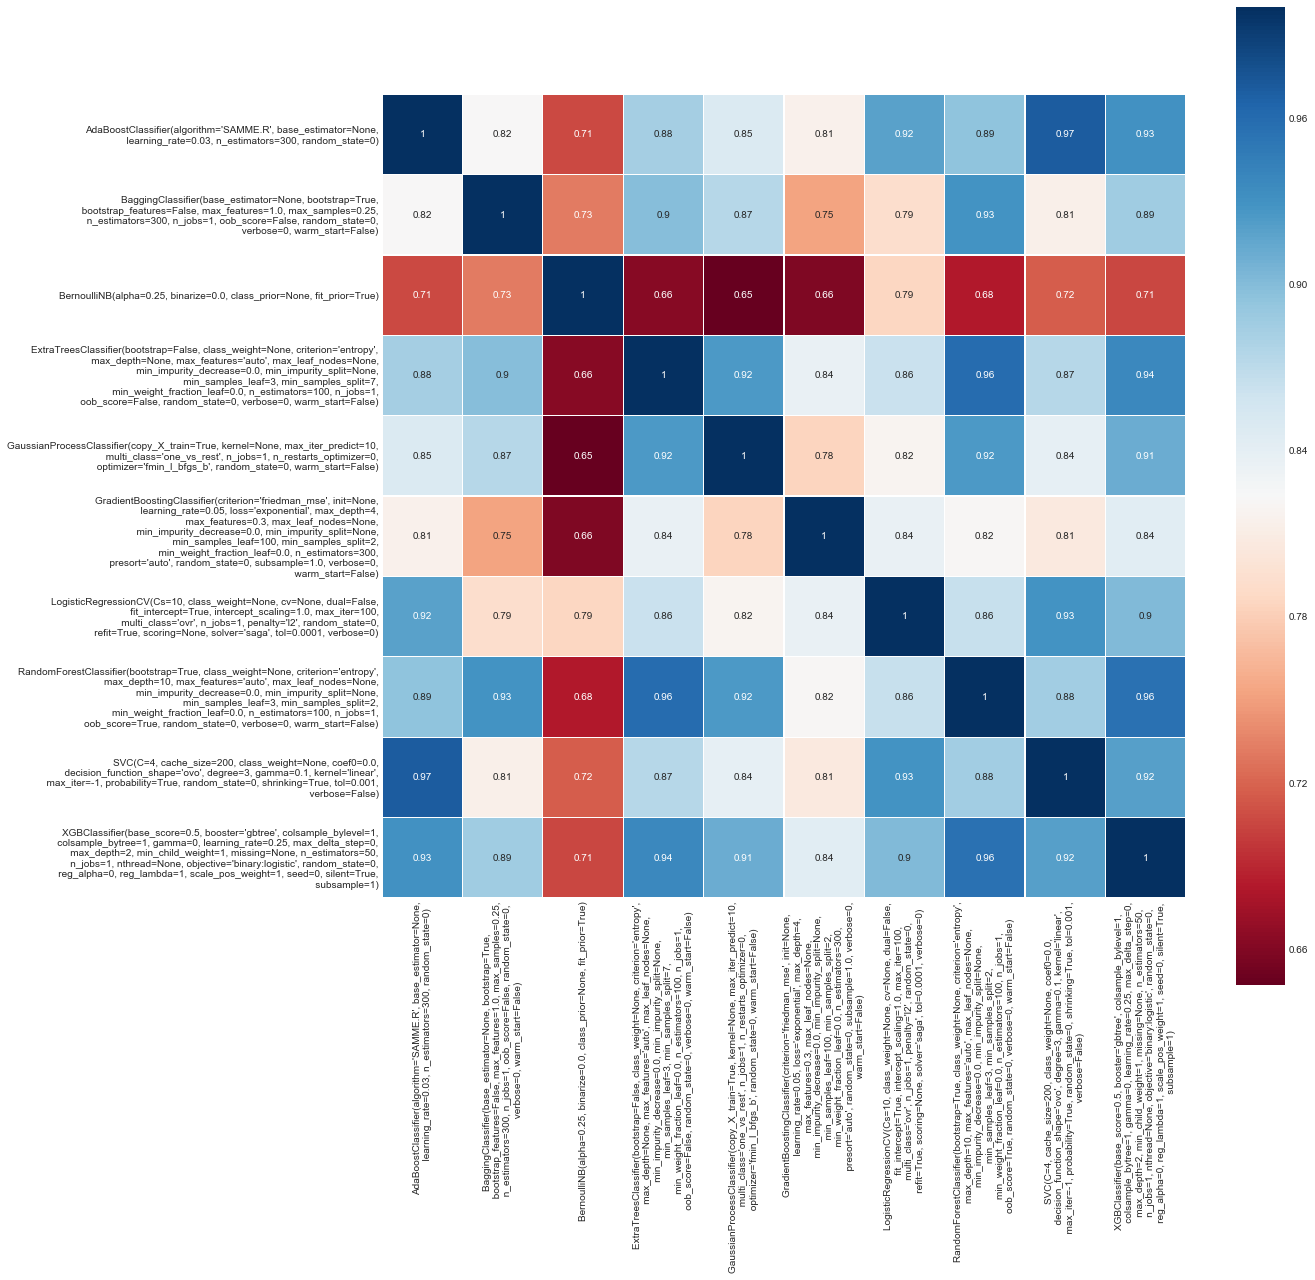

In [261]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(ML_predict_pd.astype(float).corr(), 
            linewidths = 0.1, vmax = 1.0, ax = ax,
            square = True, cmap = colormap, linecolor = 'white', 
            annot = True)

In [295]:
vote_est = [
    ('ada', adaBoost_best),
    ('bb', bagging_best),
    ('etb', extraTree_best),
    ('gbb', gradientBoosting_best),
    ('rfb', randomForest_best),
    ('gpb', gaussianProcess_best),
    ('lrb', logisticRegression_best),
    ('bnb', bernoulliNB_best),
    ('knn', kNeighbors_best),
    ('svc', svc_best),
    ('xgbc', xgbc_best)
]

In [296]:
vote_soft = ensemble.VotingClassifier(estimators = vote_est, voting = 'hard')
#vote_soft = ensemble.AdaBoostClassifier(estimators = vote_est)
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, Y_train, cv =cv_split)
vote_soft.fit(X_train, Y_train)
print("Soft voting Training w/bin score mean: {:.2f}".format(vote_soft_cv['train_score'].mean()*100))
print("Soft voting Test w/bin score mean: {:.2f}".format(vote_soft_cv['test_score'].mean()*100))
print("Soft voting Test w/bin score 3*std: ±{:.2f}".format(vote_soft_cv['test_score'].std()*100*3))

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth v

Soft voting Training w/bin score mean: 85.69
Soft voting Test w/bin score mean: 82.84
Soft voting Test w/bin score 3*std: ±5.15


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [297]:
Y_test = vote_soft.predict(X_test)
test_Survived = pd.Series(Y_test, name = 'Survived')
PassengerID = d_test['PassengerId']
submit = pd.concat([PassengerID, test_Survived], axis = 1)
submit.to_csv('../submit.csv', index = False)

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [252]:
Modelling.show_tools()


        1. firstly we need to select and initialize models:
        MLA = [...]

        2. cross validation
        cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)

        3. create table to compare MLA metrics
        MLA_columns = ['MLA Name', 'MLA PArameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']

        4. index through MLA and save performance to table
        MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
        cv_results = model_selection.cross_validate(alg, train_x, train_y, cv = cv_split)
        MLA_compare.loc[row_index, 'MLA Time'] = cv.results['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv.results['train_score'].mean() # out of date!!!!
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv.results['test_score'].me

In [266]:
es_rfe = feature_selection.RFECV(adaBoost_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
   estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.03, n_estimators=300, random_state=0),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [268]:
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

array(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length',
       'FamilySize', 'Boy', 'Has_Cabin', 'Title', 'Deck'], dtype=object)

In [272]:
es_rfe = feature_selection.RFECV(extraTree_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

array(['Pclass', 'Sex', 'Age', 'Fare', 'Name_length', 'FamilySize',
       'Has_Cabin', 'Title', 'Deck'], dtype=object)

In [273]:
es_rfe = feature_selection.RFECV(gradientBoosting_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

array(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length',
       'FamilySize', 'Has_Cabin', 'Title', 'Deck'], dtype=object)

In [274]:
es_rfe = feature_selection.RFECV(randomForest_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

array(['Pclass', 'Sex', 'FamilySize', 'Title'], dtype=object)

In [276]:
es_rfe = feature_selection.RFECV(logisticRegression_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ihuangyiran/anaconda2

array(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length',
       'FamilySize', 'Boy', 'Has_Cabin', 'Title', 'Deck'], dtype=object)

In [277]:
es_rfe = feature_selection.RFECV(bernoulliNB_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

array(['Sex', 'Parch', 'Boy'], dtype=object)

In [279]:
es_rfe = feature_selection.RFECV(svc_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

array(['Pclass', 'Sex', 'Parch', 'Fare', 'Name_length', 'FamilySize',
       'Has_Cabin', 'Title', 'Deck'], dtype=object)

In [280]:
es_rfe = feature_selection.RFECV(xgbc_best, step = 1, scoring = 'accuracy', cv = cv_split)
es_rfe.fit(X_train, Y_train)
X_rfe = X_train.columns.values[es_rfe.get_support()] # extract features
X_rfe

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sk

array(['Pclass', 'Age', 'Parch', 'Fare', 'Name_length', 'FamilySize',
       'Title', 'Deck'], dtype=object)

## currently result: 0.77

In [299]:
vote_est = [
#    ('ada', adaBoost_best),
#    ('bb', bagging_best),
    ('etb', extraTree_best),
    ('gbb', gradientBoosting_best),
    ('rfb', randomForest_best),
#    ('gpb', gaussianProcess_best),
#    ('lrb', logisticRegression_best),
#    ('bnb', bernoulliNB_best),
#    ('knn', kNeighbors_best),
    ('svc', svc_best),
#    ('xgbc', xgbc_best)
]

In [300]:
vote_soft = ensemble.VotingClassifier(estimators = vote_est, voting = 'soft')
#vote_soft = ensemble.AdaBoostClassifier(estimators = vote_est)
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, Y_train, cv =cv_split)
vote_soft.fit(X_train, Y_train)
print("Soft voting Training w/bin score mean: {:.2f}".format(vote_soft_cv['train_score'].mean()*100))
print("Soft voting Test w/bin score mean: {:.2f}".format(vote_soft_cv['test_score'].mean()*100))
print("Soft voting Test w/bin score 3*std: ±{:.2f}".format(vote_soft_cv['test_score'].std()*100*3))

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sk

Soft voting Training w/bin score mean: 84.21
Soft voting Test w/bin score mean: 82.76
Soft voting Test w/bin score 3*std: ±5.10


/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [301]:
Y_test = vote_soft.predict(X_test)
test_Survived = pd.Series(Y_test, name = 'Survived')
PassengerID = d_test['PassengerId']
submit = pd.concat([PassengerID, test_Survived], axis = 1)
submit.to_csv('../submit.csv', index = False)

/Users/ihuangyiran/anaconda2/envs/data_mining/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [302]:
submit.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
